# LOAN PREDICTION

#### by Mughundhan Chandrasekar

##  1. Setting up the Environment

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [3]:
df = pd.read_csv("/Users/Mughundhan/Analytics Vidhya/Loan Prediction/train.csv")

In [19]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## 2. Data Exploration

### 2.1. Number Variables

In [11]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [15]:
df.isnull().values.any()

True

This shows that there are missing values.
Let us now identify how many missing values in each column.

In [18]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

With this we can infer the following:
1. LoanAmount has (614 – 592) 22 missing values.
2. Loan_Amount_Term has (614 – 600) 14 missing values.
3. Credit_History has (614 – 564) 50 missing values.
4. We can also look that about 84% applicants have a credit_history. How? The mean of Credit_History field is 0.84 (We need to recall that, Credit_History has value 1 for those who have a credit history and 0 otherwise)
The ApplicantIncome distribution seems to be in line with expectation. Same with CoapplicantIncome

### 2.2. Categorical Variables 

In [8]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [21]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [22]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

## 3. Exploratory Data Analysis

### 3.1. Now let us plot the distribution of the Applicant's income.

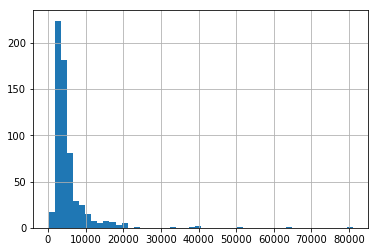

In [27]:
%matplotlib inline
df['ApplicantIncome'].hist(bins=50)


We can infer that there are few extreme values. We need to verify whether they are outliers and handle it if required.

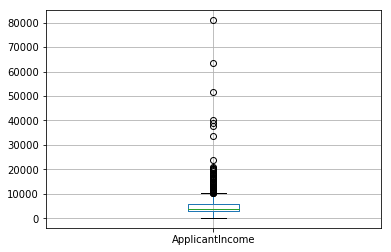

In [28]:
df.boxplot(column='ApplicantIncome')

This confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels.

Let us now seggregate them by education in-order to check the income disparity based on education levels.

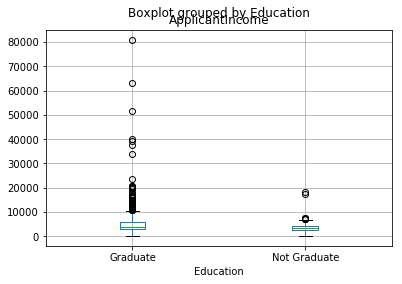

In [33]:
df.boxplot(column='ApplicantIncome', by='Education')

We can infer that Graduate have higher incomes than non-graduates (as expected). But we can also see that, there are more disparity within GRaduate's income. So let us try to make boxplots for Applicants income based on Gender as well.

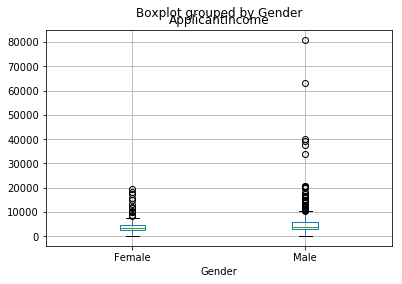

In [34]:
df.boxplot(column='ApplicantIncome', by='Gender')

We can infer that Males get higher income than females. Further, there is a huge disparity in income amongst the Males. 

### 3.2. Now let us plot the distribution of the Applicant's Loan Amount.

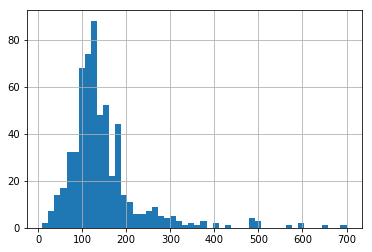

In [36]:
df['LoanAmount'].hist(bins=50)

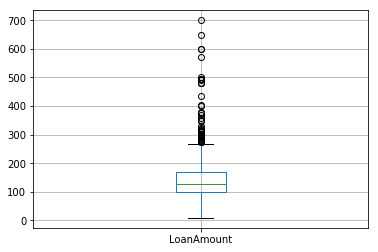

In [37]:
df.boxplot('LoanAmount')

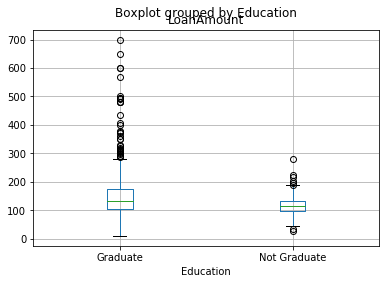

In [38]:
df.boxplot('LoanAmount', by="Education")

df.boxplot('LoanAmount', by="Gender")

Inferences:
    1. We can see that Graduates have borrowed more amount as loan when compared with non-graduates. (Expected)
    2. The disparity among both males and females are huge in-terms of the loan amount.

### 3.3. Now let us perform Categorical Variable Analysis

Let us determine the sub-categories of the Credit History variable

In [47]:
df['Credit_History'].value_counts(ascending = True)

0.0     89
1.0    475
Name: Credit_History, dtype: int64

Now let us identify the simple probability of getting the loan approved based on the Credit History. For this, we will make use of the aggregate function.

In [49]:
df.pivot_table(values="Loan_Status", index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64

Inference:
    1. There is a probability of 7% to get the loan approved, if the Credit History is Zero.
    2. There is a probability of 79% to get the loan approved, if the Credit History is One. 

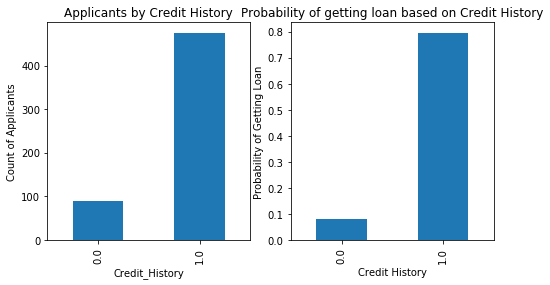

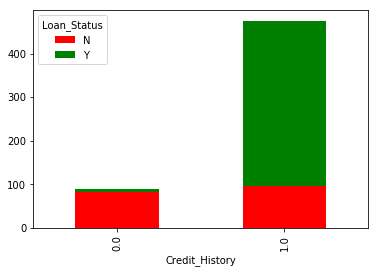

In [72]:
temp1 = df['Credit_History'].value_counts(ascending = True)
temp2 = df.pivot_table(values="Loan_Status", index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit History")
temp1.plot(kind='bar')


ax2 = fig.add_subplot(122)
temp2.plot(kind='bar')
ax2.set_xlabel('Credit History')
ax2.set_ylabel('Probability of Getting Loan')
ax2.set_title("Probability of getting loan based on Credit History")

temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red', 'green',], grid=False)

Inference: This shows that the chances of getting a loan are eight-fold if the applicant has a valid credit history. 

In [57]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [56]:
df.pivot_table(values="Loan_Status", index=['Gender'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

Gender
Female    0.669643
Male      0.693252
Name: Loan_Status, dtype: float64

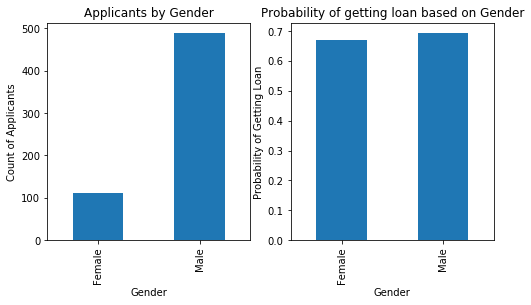

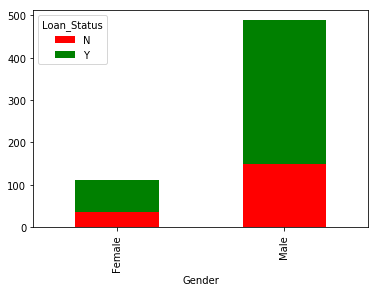

In [73]:
temp1 = df['Gender'].value_counts(ascending = True)
temp2 = df.pivot_table(values="Loan_Status", index=['Gender'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Gender')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Gender")
temp1.plot(kind='bar')


ax2 = fig.add_subplot(122)
temp2.plot(kind='bar')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Probability of Getting Loan')
ax2.set_title("Probability of getting loan based on Gender")

temp3 = pd.crosstab(df['Gender'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red', 'green',], grid=False)

Inference:
    1. The number of male applicants are significantly higher than the number of female applicants.
    2. Both men and womean have fairly equal chances of getting the loan approved.

In [61]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [62]:
df.pivot_table(values="Loan_Status", index=['Education'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

Education
Graduate        0.708333
Not Graduate    0.611940
Name: Loan_Status, dtype: float64

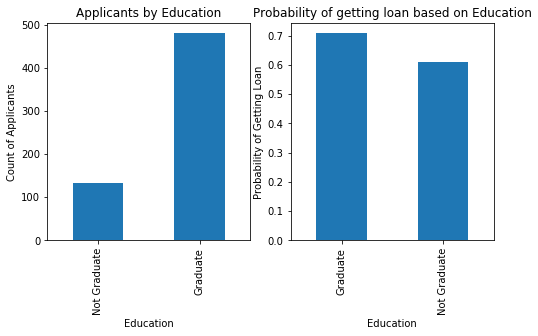

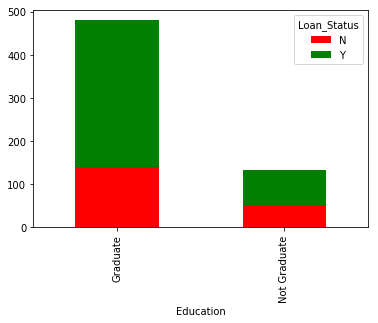

In [74]:
temp1 = df['Education'].value_counts(ascending = True)
temp2 = df.pivot_table(values="Loan_Status", index=['Education'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Education')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Education")
temp1.plot(kind='bar')


ax2 = fig.add_subplot(122)
temp2.plot(kind='bar')
ax2.set_xlabel('Education')
ax2.set_ylabel('Probability of Getting Loan')
ax2.set_title("Probability of getting loan based on Education")

temp3 = pd.crosstab(df['Education'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red', 'green',], grid=False)

Inference:
    1. Higher number of Loan applicants are Graduates, rather than non-grads.
    2. Loan gets approved for the graduates more easily than for the non-grads.

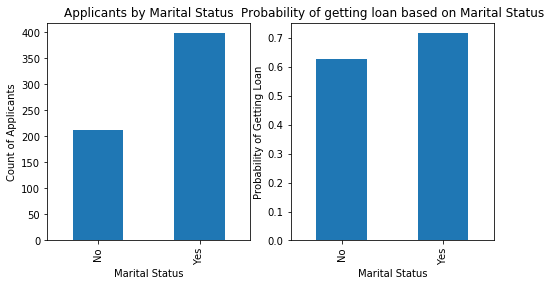

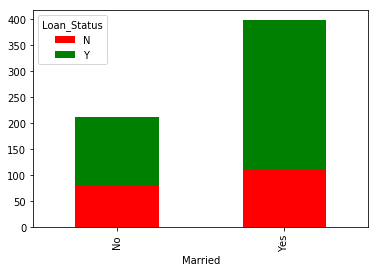

In [75]:
temp1 = df['Married'].value_counts(ascending = True)
temp2 = df.pivot_table(values="Loan_Status", index=['Married'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Marital Status')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Marital Status")
temp1.plot(kind='bar')


ax2 = fig.add_subplot(122)
temp2.plot(kind='bar')
ax2.set_xlabel('Marital Status')
ax2.set_ylabel('Probability of Getting Loan')
ax2.set_title("Probability of getting loan based on Marital Status")

temp3 = pd.crosstab(df['Married'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red', 'green',], grid=False)

Inference:

1. Higher number of Loan applicants are Married, rather than non-married.
2. Loan gets approved for the Married applicants more frequently.

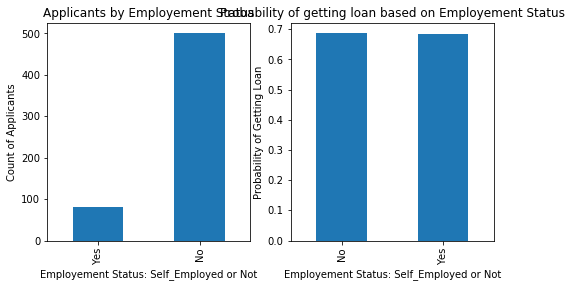

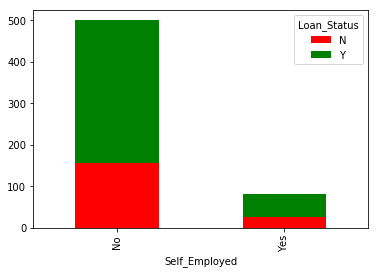

In [76]:
temp1 = df['Self_Employed'].value_counts(ascending = True)
temp2 = df.pivot_table(values="Loan_Status", index=['Self_Employed'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Employement Status: Self_Employed or Not')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Employement Status")
temp1.plot(kind='bar')


ax2 = fig.add_subplot(122)
temp2.plot(kind='bar')
ax2.set_xlabel('Employement Status: Self_Employed or Not')
ax2.set_ylabel('Probability of Getting Loan')
ax2.set_title("Probability of getting loan based on Employement Status")

temp3 = pd.crosstab(df['Self_Employed'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red', 'green',], grid=False)

Inference:

1. The number of Self-Employed applicants are signifiantly low in number.
2. Probability of loan getting approved is almost similar for both self-employed and not self-employed.

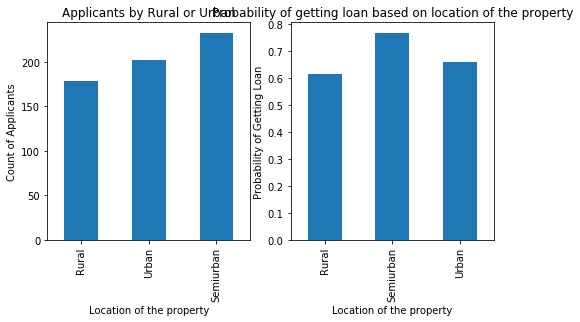

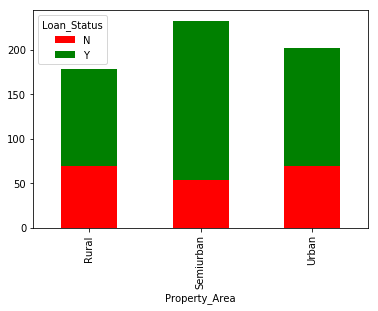

In [77]:
temp1 = df['Property_Area'].value_counts(ascending = True)
temp2 = df.pivot_table(values="Loan_Status", index=['Property_Area'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Location of the property')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Rural or Urban")
temp1.plot(kind='bar')


ax2 = fig.add_subplot(122)
temp2.plot(kind='bar')
ax2.set_xlabel('Location of the property')
ax2.set_ylabel('Probability of Getting Loan')
ax2.set_title("Probability of getting loan based on location of the property")

temp3 = pd.crosstab(df['Property_Area'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red', 'green',], grid=False)

Inference:

1. The number of applicants having a property at Semi-urban area is the highest.
2. Probability of loan getting approved is the highest for applicants having a property at Semi-urban area is the highest.

Since there is a good difference in-cases of Marital Status, Graduation Status and the Location Status, we shall now a plot a crosstab for these three variables and have a look at the probability of loan getting approved for each of these unique combinations.

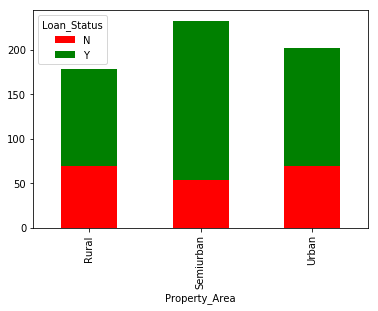

In [79]:
temp3 = pd.crosstab(df['Property_Area'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red', 'green',], grid=False)

## 4. Data Munging

As we have already seen, there are missing values and outliers in the data-set. We need to handle variables such as ApplicantIncome and LoanAmount with atmost care, as they seem to be more important (based on the exploratory data analysis)

### 4.1. Missing Values

Let us first identify the number of missing values in each column

In [4]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### a. Self_Employed 

In [5]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [6]:
df['Self_Employed'].fillna('No', inplace=True)

Since almost 90% of the applicants are not self_employed, we are going to impute missing values with the value 'No'.

In [7]:
df['Self_Employed'].isnull().sum()

0

#### b. LoanAmount 

There are multiple options to handle missing values. For eg: Build a supervised model to predict the LoanAmount based on other variables. Another option is to simply take the mean of the LoanAmount and impute missing values.

Now, as we have already imputed missing values for Self_Employed varaible and given that Education variable doesn't have any missing values, we will make use of aggregate function and create a pivot table based on these two variables. Finally we will impute missing value with the median of LoanAmount based on corresponding Education status and Self_Employed 

In [8]:
table = df.pivot_table(values='LoanAmount', index='Self_Employed', columns='Education', aggfunc=np.median)
def fage(x):
    return table.loc[x['Self_Employed'], x['Education']]
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [9]:
df['LoanAmount'].isnull().sum()

0

#### c. Gender

In [10]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [11]:
df['Gender'].fillna('Male', inplace=True)

In [12]:
df['Gender'].isnull().sum()

0

#### d. Married, Dependents, Loan_Amount_Term, Credit_History 

In [13]:
from scipy.stats import mode
df['Married'].fillna(mode(df['Married']).mode[0], inplace=True)

/Users/Mughundhan/Softwares/anaconda/lib/python2.7/site-packages/scipy/stats/stats.py:250: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)
/Users/Mughundhan/Softwares/anaconda/lib/python2.7/site-packages/numpy/lib/arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


In [14]:
df['Married'].isnull().sum()

0

In [15]:
df['Dependents'].fillna(mode(df['Dependents']).mode[0], inplace=True)

In [16]:
df['Dependents'].isnull().sum()

0

In [17]:
df['Loan_Amount_Term'].fillna(mode(df['Loan_Amount_Term']).mode[0], inplace=True)

In [18]:
df['Credit_History'].fillna(mode(df['Credit_History']).mode[0], inplace=True)

### 4.2. Outlier Analysis

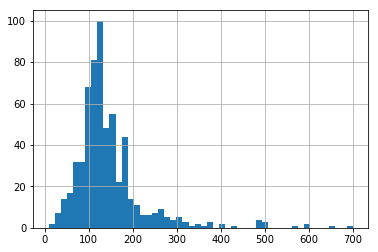

In [19]:
%matplotlib inline
df['LoanAmount'].hist(bins=50)

Since there are few extreme values, we can now try to make logarithmic transformations to nullify the effect of outliers.

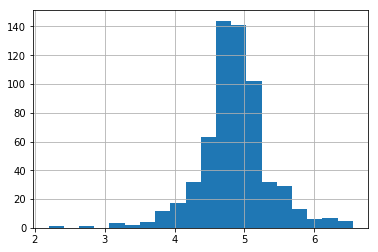

In [20]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

### 5. Feature Engineering 

It is normal to hypotheses that Income of the entire family (Applicant's income and Co-Applicant's income') play a role in loan approval process. So let us create a new variable combining these variables. We should also make sure we eliminate outliers.

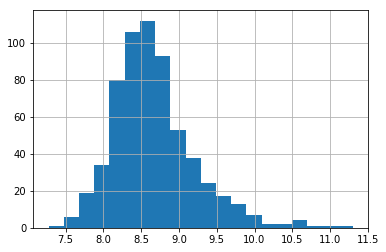

In [21]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome'] = np.log(df['TotalIncome'])
df['TotalIncome'].hist(bins=20)

In [22]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
dtype: int64

## 5. Model Building 

### 5.1. Data Loading 

We need to transform all the categorical values to number values because scikit requires all values to be numeric.

Based on the analysis, we shall arrive at the following assumptions:

Loan gets approved for the following applicants:
1. Applicants having a credit history (remember we observed this in exploration?)
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Thus, we shall perform this by encoding the categorical variables [One Hot Encoding].

In [27]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
dtype: object

### 5.2. Base Model 

Let us now create a simple prediction model. The accuracy or score of this model shall be used as the benchmark for model comparisons.

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

### 5.3. Logistic Regression

In [68]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Gender', 'Married', 'Dependents', 'Education']

def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print "Accuracy : %s" % "{0:.3%}".format(accuracy)

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print "Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome])
    
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 68.730%
Cross-Validation Score : 68.729%


In [76]:
model = LogisticRegression()
predictor_var = ['Credit_History','Education','TotalIncome','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


Generally we expect the accuracy to increase on adding variables (but too many variables also leads to Over-fitting, a trade-off exists). But this is a more challenging case. The accuracy is not getting impacted by less important variables. Credit_History is dominating the mode. We have two options now:

1. Feature Engineering: dereive new information and try to predict those.
2. Better modeling techniques.

### 5.4. Decision Trees 

This classifier shall be used over Logistic Regression in-case of complex relationship between predictor and target variables. Further, it is easier to interpret.

In [70]:
model = DecisionTreeClassifier()
predictor_var = ['Gender','Married','Education']


classification_model(model, df,predictor_var,outcome_var)

Accuracy : 68.730%
Cross-Validation Score : 68.729%


In [71]:
predictor_var = ['Credit_History','TotalIncome']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 97.883%
Cross-Validation Score : 72.155%


In [72]:
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 88.925%
Cross-Validation Score : 69.208%


In [73]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Education', 'TotalIncome','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 99.186%
Cross-Validation Score : 71.662%


One major problem associated with Decision Trees is "Overfitting". To overcome the issue of overfitting, we can try using a more robust model. 

### 5.5. Random Forest 

This is just a collection of trees. Each tree votes for a classification. The Forest chooses classification which has the most votes.

In [74]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Credit_History','Education', 'TotalIncome','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 99.186%
Cross-Validation Score : 70.351%


In [75]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log', 'TotalIncome']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 76.876%


We can see that, the problem of overfitting still exists. We shall perform the following options to overcome overfitting:

1. Reducing the number of predictors
2. Tuning the model parameters

Let us now perform some data exploration operation and identify the relative importance of each varaible.

In [62]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print featimp

Credit_History      0.271574
TotalIncome         0.267079
LoanAmount_log      0.222957
Dependents          0.052759
Property_Area       0.049873
Loan_Amount_Term    0.043454
Married             0.025719
Education           0.024323
Gender              0.021532
Self_Employed       0.020733
dtype: float64


Let us now consider only the top five predictors for building the model:

In [79]:
predictor_var = ['TotalIncome','LoanAmount_log','Credit_History','Dependents','Property_Area']
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
classification_model(model, data, predictors, outcome)

Accuracy : 83.388%
Cross-Validation Score : 82.412%


Now we can see that the Cross-Validation Score is gradually improving although the accuracy is scored lower than before. But still, 83.388% is good accuracy.

Thus, we shall finalise this model for predicting the Loan Approval process.